# Systems Immunogenetics Project

## WNV Cleaning Steps

### McWeeney Lab, Oregon Health & Science University

** Authors: Gabrielle Choonoo (choonoo@ohsu.edu) and Michael Mooney (mooneymi@ohsu.edu) **

## Introduction

This is the step-by-step process for cleaning the WNV data for qPCR data (ByLine and ByMouse).

Required Files:
* WNV Data: qPCR ByLine and ByMouse
* WNV Data Dictionary
* This notebook (qPCR.ipynb): [[Download here]](https://raw.githubusercontent.com/gchoonoo/WNV_cleaning_scripts/master/Clinical_Score.ipynb)

Required R packages:
- `gdata`
- `RColorBrewer`

**Note: this notebook can also be downloaded as an R script (only the code blocks seen below will be included): [[Download R script here]](https://raw.githubusercontent.com/gchoonoo/WNV_cleaning_scripts/master/clean_score.r)

** All code is available on GitHub: [https://github.com/gchoonoo/WNV_cleaning_scripts](https://github.com/gchoonoo/WNV_cleaning_scripts) **

# Read in data

In [1]:
library(gdata)
library(RColorBrewer)

# clean NA function
clean_na = function(data_set){
  
  for (i in 1:dim(data_set)[2]){
    #print(i)    
    if(sum(na.omit(data_set[,i] == "")) > 0){
      data_set[which(data_set[,i] == ""),i] <- NA
    }
    
  }
  return(data_set)
}

# Read in data (byLine)
read.xls(xls="./qpcr/Gale_qPCR_byLine_1_14_16.xlsx", sheet=1) -> qpcr_data

# Check if any duplicates
sum(duplicated(qpcr_data))

# Check if lines have unique mating, note if clean mating, need to remove duplicates
if(length(unique(qpcr_data[,"UW_Line"])[sapply(1:length(unique(qpcr_data[,"UW_Line"])), function(xx)length(unique(qpcr_data[as.vector(unlist(sapply(unique(qpcr_data[,"UW_Line"])[xx],function(x)which(x==qpcr_data[,"UW_Line"])))),"Mating"]))) > 1])==0){
  print("All lines have unique mating")
}else{
  print(c("Check line", unique(qpcr_data[,"UW_Line"])[sapply(1:length(unique(qpcr_data[,"UW_Line"])), function(xx)length(unique(qpcr_data[as.vector(unlist(sapply(unique(qpcr_data[,"UW_Line"])[xx],function(x)which(x==qpcr_data[,"UW_Line"])))),"Mating"]))) > 1]))
}

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size



[1] 0

[1] "All lines have unique mating"


# 1. Add Data_Altered and Notes columns

In [2]:
qpcr_data$Data_Altered = NA
qpcr_data$Notes = NA

# 2. Add Virus column from timepoints

In [3]:
qpcr_data$Virus = NA
qpcr_data[grep("M",qpcr_data[,"Timepoint"]),"Virus"] <- "Mock"
qpcr_data[-grep("M",qpcr_data[,"Timepoint"]),"Virus"] <- "WNV"

# 3. Remove 'M' from Time points and convert to numeric values

In [4]:
qpcr_data[,"Timepoint"] <- as.numeric(as.character(gsub("M","",qpcr_data[,"Timepoint"])))

# Check experiment name
sum(names(summary(qpcr_data[,"Experiment"])) == c("IFIT1","IFITM1", "IFNb1", "IL12b", "WNV")) == 5

[1] TRUE

# 4. Add Group column: UW Line, Timepoint, Virus, Tissue, Experiment separated by "_"

In [5]:
qpcr_data$Group <- paste(qpcr_data[,"UW_Line"],qpcr_data[,"Timepoint"],qpcr_data[,"Virus"],qpcr_data[,"Tissue"],qpcr_data[,"Experiment"], sep="_")

# 5. Add Lab column

In [6]:
qpcr_data$Lab = "Gale"

# 6. Process ByMouse Data File

In [9]:
# read in by mouse file
read.xls(xls="./qpcr/Gale_qPCR_byMouse_1_14_16.xlsx", sheet=1) -> qpcr_data_mouse

# check if any CT < 15, none in this case
length(which(qpcr_data_mouse[,"Ct"] < 15))

[1] 0

* a. Remove 'M' from Time points and convert to numeric values

In [10]:
qpcr_data_mouse[,"Timepoint"] <- as.numeric(as.character(gsub("M","",qpcr_data_mouse[,"Timepoint"])))

* b. Change "Condition" column name to "Virus"

In [11]:
names(qpcr_data_mouse)[which(names(qpcr_data_mouse) == "Condition")] <- "Virus"

# check experiment names
sum(names(summary(qpcr_data_mouse[,"Experiment"])) == c("IFIT1","IFITM1", "IFNb1", "IL12b", "WNV")) == 5

# check if any lines have 2 different matings, none in this case
if(length(unique(qpcr_data_mouse[,"UW_Line"])[sapply(1:length(unique(qpcr_data_mouse[,"UW_Line"])), function(xx)length(unique(qpcr_data_mouse[as.vector(unlist(sapply(unique(qpcr_data_mouse[,"UW_Line"])[xx],function(x)which(x==qpcr_data_mouse[,"UW_Line"])))),"Mating"]))) > 1])==0){
  print("All lines have unique mating")
}else{
  print(c("Check line", unique(qpcr_data_mouse[,"UW_Line"])[sapply(1:length(unique(qpcr_data_mouse[,"UW_Line"])), function(xx)length(unique(qpcr_data_mouse[as.vector(unlist(sapply(unique(qpcr_data_mouse[,"UW_Line"])[xx],function(x)which(x==qpcr_data_mouse[,"UW_Line"])))),"Mating"]))) > 1]))
}

[1] TRUE

[1] "All lines have unique mating"


* c. Add Group: UW Line, Timepoint, Virus, Tissue, Experiment separated by "_"

In [12]:
qpcr_data_mouse$Group <- paste(qpcr_data_mouse[,"UW_Line"],qpcr_data_mouse[,"Timepoint"], qpcr_data_mouse[,"Virus"],qpcr_data_mouse[,"Tissue"],qpcr_data_mouse[,"Experiment"], sep="_")

* d. Add Data_Altered and Notes columns

In [13]:
qpcr_data_mouse$Data_Altered = NA
qpcr_data_mouse$Notes = NA
qpcr_data_mouse$Lab = "Gale"

* e. Calculate dct mean, N, dct sd, baseline.dct, ddct mean, fc mean and check these are correct in the ByLine Data File

In [14]:
# dct mean
dct_mean = aggregate(formula=qpcr_data_mouse[,"dCt"]~qpcr_data_mouse[,"Group"], data=qpcr_data_mouse, FUN=mean)
names(dct_mean) <- c("Group","dCt.mean.V2")
dct_mean[order(dct_mean[,1]),] -> dct_mean_order

byline_dct_mean = unique(qpcr_data[,c("Group","dCt.mean")])
byline_dct_mean[order(byline_dct_mean[,1]),] -> byline_dct_mean_order

check_dct_mean = sapply(1:dim(dct_mean_order)[1],function(x)isTRUE(all.equal(dct_mean_order[x,2],byline_dct_mean_order[x,2])))

if(sum(check_dct_mean) == nrow(dct_mean_order)){
  print("All dct mean correct")
}else{
  print("Need to clean dct mean")
}

# check n
data.frame(summary(as.factor(qpcr_data_mouse[,"Group"]),maxsum=8000)) -> bymouse_n
names(bymouse_n) <- c("N")

bymouse_n[,2] <- row.names(bymouse_n)
names(bymouse_n)[2] <- "Group"

bymouse_n[order(bymouse_n[,"Group"]),] -> bymouse_n_v2

qpcr_data[,c("Group","N")] -> byline_n
byline_n[order(byline_n[,"Group"]),] -> byline_n_v2

if(sum(bymouse_n_v2[,1] == byline_n_v2[,2]) == nrow(bymouse_n_v2)){
  print("All N correct")
}else{
  print("Need to clean N")
}

# check dct sd
dct_sd = aggregate(formula=qpcr_data_mouse[,"dCt"]~qpcr_data_mouse[,"Group"], data=qpcr_data_mouse, FUN=sd)
names(dct_sd) <- c("Group","dCt.sd.V2")
dct_sd[order(dct_sd[,1]),] -> dct_sd_order

byline_dct_sd = qpcr_data[,c("Group","dCt.sd")]
byline_dct_sd[order(byline_dct_sd[,1]),] -> byline_dct_sd_order

check_dct_sd = sapply(1:dim(dct_sd_order)[1],function(x)isTRUE(all.equal(dct_sd_order[x,2],byline_dct_sd_order[x,2])))

if(sum(check_dct_sd) == nrow(dct_sd_order)){
  print("All dct sd correct")
}else{
  print("Need to clean dct sd")
}

# check baseline. dct

# add group g to annotate baseline
qpcr_data$Group_g <- paste(qpcr_data[,"UW_Line"],qpcr_data[,"Tissue"], qpcr_data[,"Experiment"],sep="_")

qpcr_data$baseline.dCt.V2 = NA

# calculate baseline, baseline is 12 for this data
baseline = 12

for(i in unique(qpcr_data[,"Group_g"])){
  qpcr_data[which(qpcr_data[,"Group_g"] == i),"baseline.dCt.V2"] <- qpcr_data[which(qpcr_data[,"Group_g"] == i & qpcr_data[,"Virus"] == "Mock" & qpcr_data[,"Timepoint"] == baseline),"dCt.mean"]
}

# check all baseline correct
if(sum(qpcr_data[,"baseline.dCt"] == qpcr_data[,"baseline.dCt.V2"]) == nrow(qpcr_data)){
  print("All baseline dct correct")
}else{
  print("Need to clean baseline dct")
}

# calculate ddct mean to check 
qpcr_data$ddCt.mean.V2 <- as.numeric(as.character(qpcr_data[,"dCt.mean"])) - as.numeric(as.character(qpcr_data[,"baseline.dCt"]))

check_ddct_mean = sapply(1:dim(qpcr_data)[1],function(x)isTRUE(all.equal(qpcr_data[x,"ddCt.mean"], qpcr_data[x,"ddCt.mean.V2"], tolerance=5.5e-8)))

# all ddct mean correct
if(sum(check_ddct_mean) == dim(qpcr_data)[1]){
  print("All dct mean correct")
}else{
  print("Need to clean dct mean")
}

# check fc mean correct
qpcr_data$fc.mean.V2 <- 2^-qpcr_data[,"ddCt.mean"]

check_fc_mean = sapply(1:dim(qpcr_data)[1],function(x)isTRUE(all.equal(qpcr_data[x,"fc.mean"], qpcr_data[x,"fc.mean.V2"])))

if(sum(check_fc_mean) == dim(qpcr_data)[1]){
  print("All fc mean correct")
}else{
  print("Need to clean fc mean")
}


[1] "All dct mean correct"
[1] "All N correct"
[1] "All dct sd correct"
[1] "All baseline dct correct"
[1] "All dct mean correct"
[1] "All fc mean correct"


# 7. Remove ddCt.sd and fc.sd columns

In [15]:
# take out V2's if calculated correctly, and ddct.sd, fc.sd since not using
remove_cols = c("ddCt.sd", "fc.sd", "baseline.dCt.V2", "ddCt.mean.V2", "fc.mean.V2")

qpcr_data[,-as.vector(unlist(sapply(remove_cols,function(x)which(x==names(qpcr_data)))))] -> qpcr_data_v2

# 8. Add baseline.dCt.sd column (this is the dCt.sd value for the baseline animal)

In [16]:
qpcr_data_v2$baseline.dCt.sd = NA

# compute baseline sd, use baseline = 12 saved above
for(i in unique(qpcr_data_v2[,"Group_g"])){
  qpcr_data_v2[which(qpcr_data_v2[,"Group_g"] == i),"baseline.dCt.sd"] <- qpcr_data_v2[which(qpcr_data_v2[,"Group_g"] == i & qpcr_data_v2[,"Virus"] == "Mock" & qpcr_data_v2[,"Timepoint"] == baseline),"dCt.sd"]
}

# 9. Add ddCt.se = sqrt(dCt.sd^2/N1 + baseline.dCt.sd^2/N2)

In [19]:
ddCt.se = sapply(1:dim(qpcr_data_v2)[1],function(x){
  sqrt(
    (qpcr_data_v2[x,"dCt.sd"]^2/qpcr_data_v2[x,"N"])+                                                                  (qpcr_data_v2[x,"baseline.dCt.sd"]^2/qpcr_data_v2[which(qpcr_data_v2[,"Group_g"] == qpcr_data_v2[x,"Group_g"] & qpcr_data_v2[,"Virus"] == "Mock" & qpcr_data_v2[,"Timepoint"] == baseline),"N"])
  )
})

qpcr_data_v2$ddCt.se <- ddCt.se

# order by group
qpcr_data_v2[order(qpcr_data_v2[,"Group"]),] -> qpcr_data_v3_final

# double check all calculations are correct

# dct mean
isTRUE(all.equal(dct_mean[,2],qpcr_data_v3_final[,"dCt.mean"]))

# N
isTRUE(all.equal(bymouse_n[,"N"],qpcr_data_v3_final[,"N"]))

# dct sd
isTRUE(all.equal(dct_sd[,2],qpcr_data_v3_final[,"dCt.sd"]))

# baseline
isTRUE(all.equal(qpcr_data[order(qpcr_data[,"Group"]),"baseline.dCt.V2"],qpcr_data_v3_final[,"baseline.dCt"]))

# ddctmean
isTRUE(all.equal(qpcr_data[order(qpcr_data[,"Group"]),"ddCt.mean.V2"],qpcr_data_v3_final[,"ddCt.mean"]))

# fc mean
isTRUE(all.equal(qpcr_data[order(qpcr_data[,"Group"]),"fc.mean.V2"],qpcr_data_v3_final[,"fc.mean"]))

# baseline sd, computed using corrected dct sd's at timepoint 12

# ddct se, computed using correct dct sd and baseline sd

# remove group g
qpcr_data_v3_final[,!(names(qpcr_data_v3_final) %in% "Group_g")] -> qpcr_data_final_format


[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

# 10. Order columns according to the data dictionary

In [20]:
# read in first column of qpcr by line
mycols <- rep("NULL", 4)
mycols[1] <- NA

read.xls(xls="WNV_Data_Dictionary.xlsx", sheet="qPCR Data - By Line", colClasses=mycols) -> data_dict

qpcr_data_final_format[,as.vector(unlist(sapply(data_dict[,1],function(x)which(x==names(qpcr_data_final_format)))))] -> qpcr_data_final_format_order

# read in first column of qpcr by mouse
mycols <- rep("NULL", 4)
mycols[1] <- NA

read.xls(xls="WNV_Data_Dictionary.xlsx", sheet="qPCR Data - By Mouse", colClasses=mycols) -> data_dict_mouse

qpcr_data_mouse[,as.vector(unlist(sapply(data_dict_mouse[,1],function(x)which(x==names(qpcr_data_mouse)))))] -> qpcr_data_mouse_order

# check both byline and bymouse have the same UW lines
names(summary(as.factor(qpcr_data_mouse_order[,"UW_Line"]))) == names(summary(as.factor(qpcr_data_final_format_order[,"UW_Line"])))

[1] TRUE TRUE TRUE TRUE TRUE TRUE

# 11. Update Data

In [21]:
# Read in previous version of byline data
read.xls(xls="./Gale_qPCR_byLine_23-Mar-2016_final.xlsx", sheet=1) -> qpcr_line

# combine old and new data
rbind(qpcr_line, qpcr_data_final_format_order) -> qpcr_byline_updated

# clean NA
clean_na(qpcr_byline_updated) -> qpcr_byline_updated_cleaned

# Remove duplicates
if(sum(duplicated(qpcr_byline_updated_cleaned)) != 0){
  qpcr_byline_updated_cleaned[!duplicated(qpcr_byline_updated_cleaned),] -> qpcr_byline_updated_cleaned
}

# Read in previous version of bymouse data
read.xls(xls="./Gale_qPCR_byMouse_23-Mar-2016_final.xlsx", sheet=1) -> qpcr_bymouse

# combine old and new data
rbind(qpcr_bymouse, qpcr_data_mouse_order) -> qpcr_bymouse_updated

# clean NA
clean_na(qpcr_bymouse_updated) -> qpcr_bymouse_updated_cleaned

# Remove duplicates
if(sum(duplicated(qpcr_bymouse_updated_cleaned)) != 0){
  qpcr_byline_updated_cleaned[!duplicated(qpcr_bymouse_updated_cleaned),] -> qpcr_bymouse_updated_cleaned
}

# 9. Make specific alterations listed in the Readme. 

# Example plot

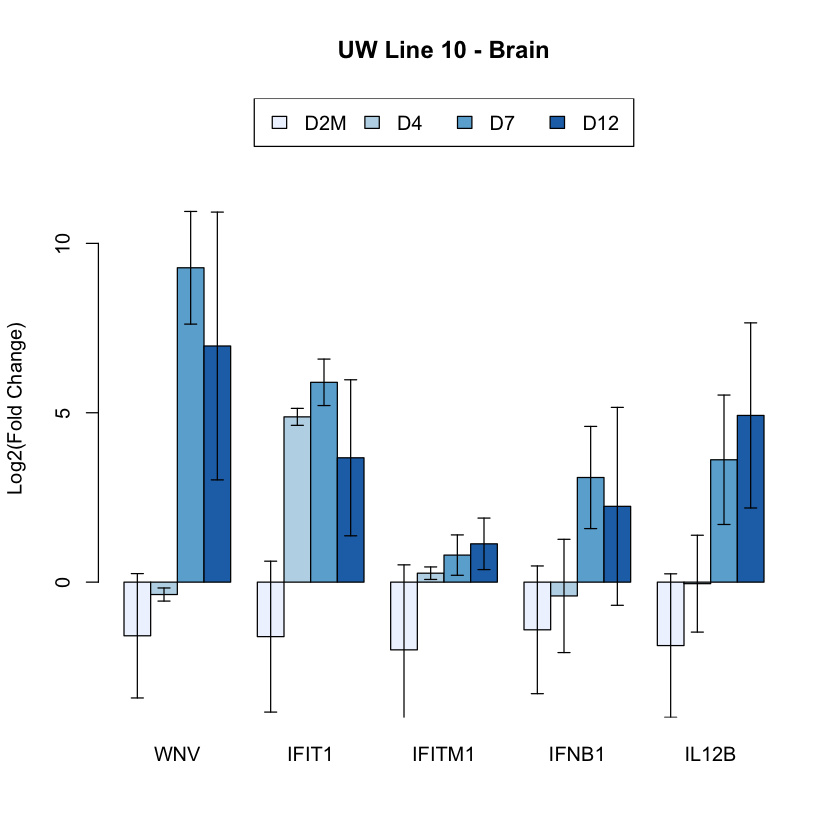

In [22]:
# Error bar function
error.bar = function(x, y, upper, lower=upper, arrow.length=0.05, ...) {
  if(length(x) != length(y) | length(y) !=length(lower) | length(lower) != length(upper)) {
    print('x')
    print(length(x))
    print('y')
    print(length(y))
    print('upper')
    print(length(upper))
    stop("vectors must be same length")
  }
  arrows(x, y+upper, x, y-lower, angle=90, code=3, length=arrow.length, ...)
}

# Format data for plotting
qpcr_barplot_data = function(qpcr_byline_updated_cleaned, baseline=12, line, tissue, line_colors=NULL) {
  tp = as.character(sort(as.numeric(unique(qpcr_byline_updated_cleaned$Timepoint[qpcr_byline_updated_cleaned$UW_Line==line & tolower(qpcr_byline_updated_cleaned$Tissue)==tolower(tissue) & qpcr_byline_updated_cleaned$Virus=='WNV']))))
  if (length(tp) == 0) {
    return(NULL)
  }
  mock_tp = as.character(sort(as.numeric(unique(qpcr_byline_updated_cleaned$Timepoint[qpcr_byline_updated_cleaned$UW_Line==line & tolower(qpcr_byline_updated_cleaned$Tissue)==tolower(tissue) & qpcr_byline_updated_cleaned$Virus=='Mock']))))
  mock_tp = mock_tp[!mock_tp %in% baseline]
  
  exp_names = sort(tolower(unique(qpcr_byline_updated_cleaned$Experiment[qpcr_byline_updated_cleaned$UW_Line==line & tolower(qpcr_byline_updated_cleaned$Tissue)==tolower(tissue) & qpcr_byline_updated_cleaned$Virus=='WNV'])))
  if ('wnv' %in% exp_names) {
    if (length(exp_names) > 1) {
      exp_names = exp_names[c(length(exp_names), c(1:(length(exp_names)-1)))]
    }
  }
  
  mock_line_mat = matrix(ncol=0, nrow=length(mock_tp))
  mock_se_mat = matrix(ncol=0, nrow=length(mock_tp))
  line_mat = matrix(ncol=0, nrow=length(tp))
  se_mat = matrix(ncol=0, nrow=length(tp))
  
  ## Mock data
  if (length(mock_tp) > 0) {
    for (exp in exp_names) {
      exp_dat = c()
      exp_se = c()
      for (t in mock_tp) {
        tp_dat = qpcr_byline_updated_cleaned$fc.mean[with(qpcr_byline_updated_cleaned, UW_Line==line & tolower(Tissue)==tolower(tissue) & tolower(Experiment)==exp & Timepoint==t & Virus=='Mock')]
        #print(tp_dat)
        se_dat = qpcr_byline_updated_cleaned$ddCt.se[with(qpcr_byline_updated_cleaned, UW_Line==line & tolower(Tissue)==tolower(tissue) & tolower(Experiment)==exp & Timepoint==t & Virus=='Mock')]
        #print(se_dat)
        se_dat = 2^(-se_dat)
        #print(tp_dat)
        if (length(tp_dat) == 0) {
          exp_dat = c(exp_dat, NA)
          exp_se = c(exp_se, NA)
        } else {
          exp_dat = c(exp_dat, tp_dat)
          exp_se = c(exp_se, se_dat)
        }
      }
      mock_line_mat = cbind(mock_line_mat, exp_dat)
      mock_se_mat = cbind(mock_se_mat, exp_se)
    }
  }
  #print(mock_line_mat)
  
  ## WNV data
  for (exp in exp_names) {
    exp_dat = c()
    exp_se = c()
    for (t in tp) {
      tp_dat = qpcr_byline_updated_cleaned$fc.mean[with(qpcr_byline_updated_cleaned, UW_Line==line & tolower(Tissue)==tolower(tissue) & tolower(Experiment)==exp & Timepoint==t & Virus=='WNV')]
      se_dat = qpcr_byline_updated_cleaned$ddCt.se[with(qpcr_byline_updated_cleaned, UW_Line==line & tolower(Tissue)==tolower(tissue) & tolower(Experiment)==exp & Timepoint==t & Virus=='WNV')]
      #print(se_dat)
      se_dat = 2^(-se_dat)
      #print(tp_dat)
      if (length(tp_dat) == 0) {
        exp_dat = c(exp_dat, NA)
        exp_se = c(exp_se, NA)
      } else {
        exp_dat = c(exp_dat, tp_dat)
        exp_se = c(exp_se, se_dat)
      }
    }
    line_mat = cbind(line_mat, exp_dat)
    se_mat = cbind(se_mat, exp_se)
  }
  
  if (dim(mock_line_mat)[1] > 0) {
    line_mat = rbind(mock_line_mat, line_mat)
    se_mat = rbind(mock_se_mat, se_mat)
  }

  mock_names = c()
  if (length(mock_tp) > 0) {
    mock_names = paste('D', mock_tp, 'M', sep='')
  } 
  wnv_names = paste('D', tp, sep='')
  rownames(line_mat) = c(mock_names, wnv_names)
  colnames(line_mat) = toupper(exp_names)
  rownames(se_mat) = c(mock_names, wnv_names)
  colnames(se_mat) = toupper(exp_names)
  
  ## Return barplot matrix
  return(list(bardat=line_mat, sedat=se_mat, uw_line=line, tissue=tissue))
  
}

# Bar plot function
qpcr_barplot = function(barplot_data) {
  title = paste('UW Line', barplot_data$uw_line, '-', barplot_data$tissue, sep=' ')
  tp_colors = brewer.pal(dim(barplot_data$bardat)[1],'Blues')
  #print(min(log2(barplot_data$bardat), na.rm=T))
  barx = barplot(log2(barplot_data$bardat), beside=T, legend=T, args.legend=list(x='top', ncol=dim(barplot_data$bardat)[1]), ylim=c(min(log2(barplot_data$bardat), na.rm=T)-2, max(log2(barplot_data$bardat), na.rm=T)+5), xpd=FALSE, ylab='Log2(Fold Change)', main=title, col=tp_colors)
  error.bar(barx, log2(barplot_data$bardat), log2(barplot_data$sedat))
}

# Generate bar plot data for line 10 in brain tissue
barplot_data = qpcr_barplot_data(qpcr_byline_updated_cleaned, baseline=12, line="10", tissue="Brain")

# Generate bar plot
qpcr_barplot(barplot_data=barplot_data)
